In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial
import time
from scipy.stats import chi, expon
import scipy


## The HDF5 event files
The dataframes (called 'Particles') are stored in HDF5 files. There is one file for simulated 2vbb events, and one file for simulated background events. The backrounds simulated are Tl208, Bi214, Co60, and K40.

For the backgrounds, there is one entry per event, and for 2vbb, there are two entries per event (one for each primary electron). All of the 2vbb events can be keyed by the 'event' attribute, which is unique.

In [2]:
'''
Load in dataframe:
'''

fname = './files/BG_NEW_1d.h5'
df_particles = pd.read_hdf(fname, 'Particles')

In [3]:
'''
Look at which variables are stored in BG the dataframe:
'''
print('True background variables:')
print(df_particles.columns.tolist()[:8])
print()
print('Reconstructed background variables:')
print(df_particles.columns.tolist()[8:])

True background variables:
['event', 'initial_x', 'initial_y', 'initial_z', 'n_brems', 'n_electrons', 'e_displacement', 'mcs_angle']

Reconstructed background variables:
['mass_number', 'region', 'nS2', 'reco_energy', 'reco_length', 'reco_numb_of_tracks', 'reco_x_min', 'reco_y_min', 'reco_z_min', 'reco_r_min', 'reco_x_max', 'reco_y_max', 'reco_z_max', 'reco_r_max', 'reco_x_ave', 'reco_y_ave', 'reco_z_ave', 'reco_r_ave', 'reco_extreme1_x', 'reco_extreme1_y', 'reco_extreme1_z', 'reco_extreme2_x', 'reco_extreme2_y', 'reco_extreme2_z', 'reco_blob1_x', 'reco_blob1_y', 'reco_blob1_z', 'reco_blob2_x', 'reco_blob2_y', 'reco_blob2_z', 'reco_eblob1', 'reco_eblob2', 'reco_ovlp_blob_energy']


# Analysis cuts:
Recreate the NEXT NEW 2vbb analysis cuts:<br>
<img src="images/slide_procedure.png" width=600><br>
From Alberto's CM slides: <br>
https://next.ific.uv.es/DocDB/0009/000981/001/MC-data_efficiencies_studies_MC_november.pdf

In [4]:
'''
Make fiducial and S2 cuts for all data:
'''

df_particles = df_particles[(df_particles['nS2'] == 1)&(df_particles['reco_z_min'] > 20)&(df_particles['reco_z_max'] < 510)&(df_particles['reco_r_max'] < 178)]

In [5]:
'''
Make remaining analysis cuts here:
'''

df_particles_selection = df_particles[(df_particles['reco_numb_of_tracks'] == 1)&(df_particles['reco_ovlp_blob_energy'] == 0.0)
                                      &(df_particles['reco_eblob2']*1000 > 355.55*(1-np.exp(-0.00133*df_particles['reco_energy']*1000)))]
print('Background selection efficiency: %s'%(len(df_particles_selection)/len(df_particles)))

Background selection efficiency: 0.1139991658135214


# Reconstructed energy distribution of final background event selection

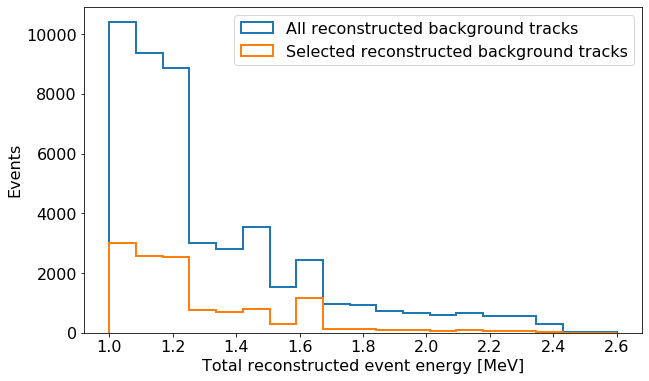

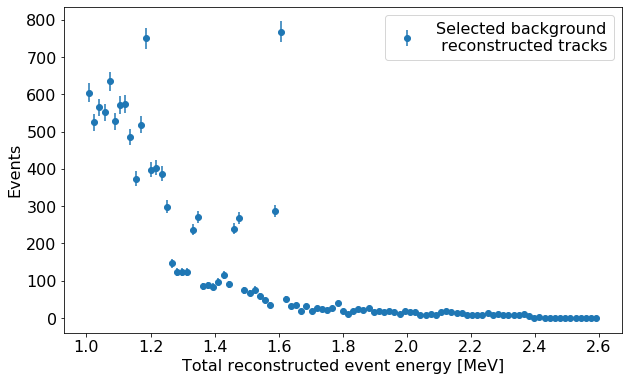

In [6]:
'''
Plot the energy of the reconstructed tracks before and after selection.
'''

plt.figure(figsize=(10,6))

ebins = np.linspace(1,2.6,20)
plt.hist(df_particles['reco_energy'], bins=ebins, histtype='step', lw=2, label='All reconstructed background tracks');
plt.hist(df_particles_selection['reco_energy'], bins=ebins, histtype='step', lw=2, label='Selected reconstructed background tracks');

plt.xlabel('Total reconstructed event energy [MeV]', fontsize=16)
plt.ylabel('Events', fontsize=16)
plt.tick_params(which='major', axis='both', labelsize=16)

plt.legend(loc='upper right', fontsize=16)


plt.figure(figsize=(10,6))

ebins = np.linspace(1,2.6,100)
bin_centers = (ebins[1:] + ebins[:-1])/2
energy_counts,_ = np.histogram(df_particles_selection['reco_energy'], bins=ebins)

plt.errorbar(bin_centers, energy_counts, yerr=np.sqrt(energy_counts), fmt='o', label='Selected background\n reconstructed tracks');

plt.xlabel('Total reconstructed event energy [MeV]', fontsize=16)
plt.ylabel('Events', fontsize=16)
plt.tick_params(which='major', axis='both', labelsize=16)

plt.legend(loc='upper right', fontsize=16)

# Distributions of physics variables
We can look at the distribution of physical variables in the full generated background set and compare it to the selected set of variables.
<br>
First we look at the atomic mass radioactive isotope that produced the event. The isotopes that were simulated are: $^{40}$K, $^{60}$Co, $^{208}$Tl, $^{214}$Bi. Next, we look at the number of electrons produced in the background event with a kinetic energy greater than 100 keV. Finally, we look at the number of photons produced through the Bremsstrahlung process in the background event.

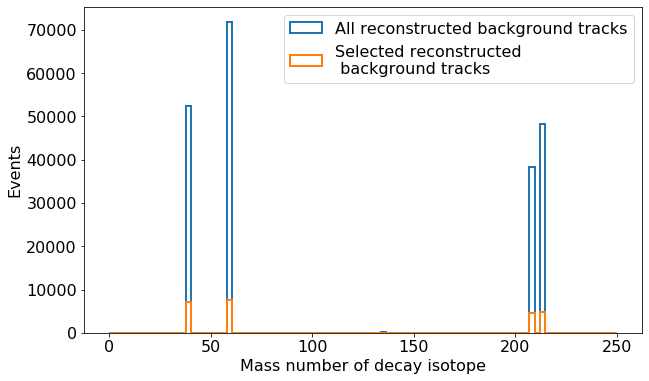

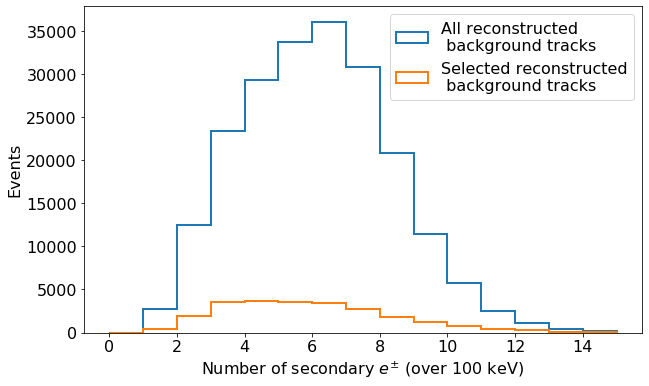

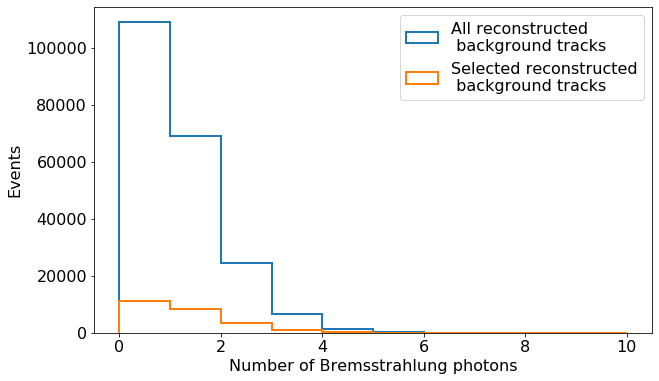

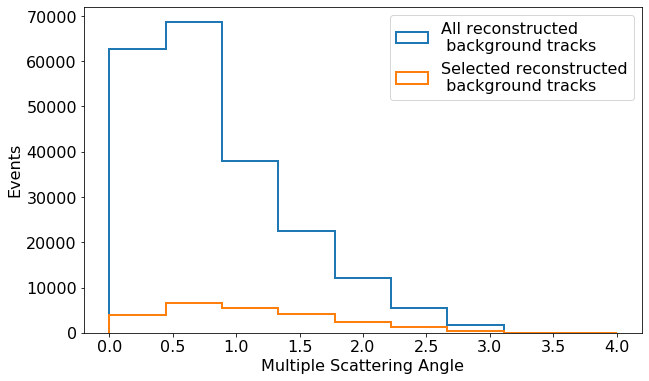

In [7]:
'''
Plot some MC true variables.
'''

plt.figure(figsize=(10,6))

mbins=np.linspace(0,250,100)
plt.hist(df_particles['mass_number'], bins=mbins, histtype='step', lw=2, label='All reconstructed background tracks');
plt.hist(df_particles_selection['mass_number'], bins=mbins, histtype='step', lw=2, label='Selected reconstructed\n background tracks');

plt.xlabel('Mass number of decay isotope', fontsize=16)
plt.ylabel('Events', fontsize=16)
plt.tick_params(which='major', axis='both', labelsize=16)

plt.legend(loc='upper right', fontsize=16)


plt.figure(figsize=(10,6))

elbins = np.linspace(0,15,16)
plt.hist(df_particles['n_electrons'], bins=elbins, histtype='step', lw=2, label='All reconstructed\n background tracks');
plt.hist(df_particles_selection['n_electrons'], bins=elbins, histtype='step', lw=2, label='Selected reconstructed\n background tracks');

plt.xlabel(r'Number of secondary $e^{\pm}$ (over 100 keV)', fontsize=16)
plt.ylabel('Events', fontsize=16)
plt.tick_params(which='major', axis='both', labelsize=16)

plt.legend(loc='upper right', fontsize=16)


plt.figure(figsize=(10,6))

brbins = np.linspace(0,10,11)
plt.hist(df_particles['n_brems'], bins=brbins, histtype='step', lw=2, label='All reconstructed\n background tracks');
plt.hist(df_particles_selection['n_brems'], bins=brbins, histtype='step', lw=2, label='Selected reconstructed\n background tracks');

plt.xlabel(r'Number of Bremsstrahlung photons', fontsize=16)
plt.ylabel('Events', fontsize=16)
plt.tick_params(which='major', axis='both', labelsize=16)

plt.legend(loc='upper right', fontsize=16)

plt.figure(figsize=(10,6))

mcsbins = np.linspace(0,4,10)

plt.hist(df_particles['mcs_angle'], bins=mcsbins, histtype='step', lw=2, label='All reconstructed\n background tracks');
plt.hist(df_particles_selection['mcs_angle'], bins=mcsbins, histtype='step', lw=2, label='Selected reconstructed\n background tracks');

plt.xlabel(r'Multiple Scattering Angle', fontsize=16)
plt.ylabel('Events', fontsize=16)
plt.tick_params(which='major', axis='both', labelsize=16)

plt.legend(loc='upper right', fontsize=16)


# Effect on event selection from varying physics variables
There is some uncertainty in the true distribution of each of these variables. We can look and see how the reconstructed energy distribution of our final event selection would change if we vary these distributions.
<br>
We can do this by applying "weights" to events. If we assume that some events are underestimated, we weight them higher, and if we assume they are overestimated, we weight them lower. These weights are propagated through to the final reconstructed energy distribution where we can evaluate the effect.

## Bremsstrahlung
First, we look at what happens to the reconstructed energy distribution if the number of photons produced through Bremsstrahlung tends to be larger or smaller than what is predicted.
<br>
In the first example, we shift the true number of brems higher. The weights are generated assuming the brem rate is 5% higher. To determine the weights, we assume that the number of brems follows a Poisson distribution with a rate of $\lambda$. The value of $\lambda$ is caclulated from the mean of the number of brems:

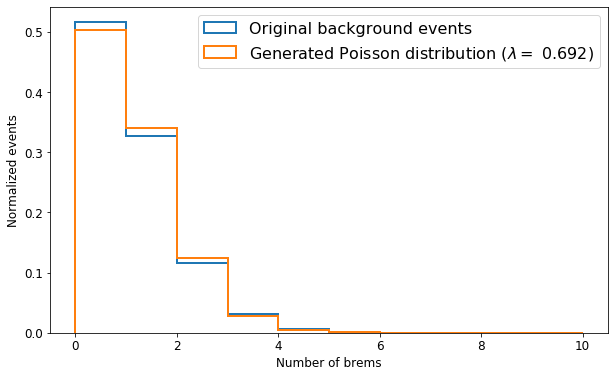

In [8]:
plt.figure(figsize=(10,6))

rate0 = df_particles['n_brems'].mean()
brem_pois = np.random.poisson(rate0, 10000)

plt.hist(df_particles['n_brems'], bins=brbins, histtype='step', lw=2, density=True, label='Original background events');
plt.hist(brem_pois, bins=brbins, histtype='step', lw=2, density=True, label=r'Generated Poisson distribution ($\lambda =$ %2.3f)'%rate0)

plt.ylabel('Normalized events', fontsize=12)
plt.xlabel('Number of brems', fontsize=12)

plt.tick_params(which='major', axis='both', labelsize=12)
plt.tick_params(which='major', axis='both', labelsize=12)

plt.legend(loc='upper right', fontsize=16)

Since the distribution of the number of brems and the distribution of the reconstructed energy are not independent of eachother, reweighting the events based on number of brems will change the energy distribution, which we don't want to do. To avoid this problem, we can reweight the brem distribution individually for energy slices. Then, when sampling, we can randomly vary the energy slices (bin widths) to average out the effect on the energy distribution.

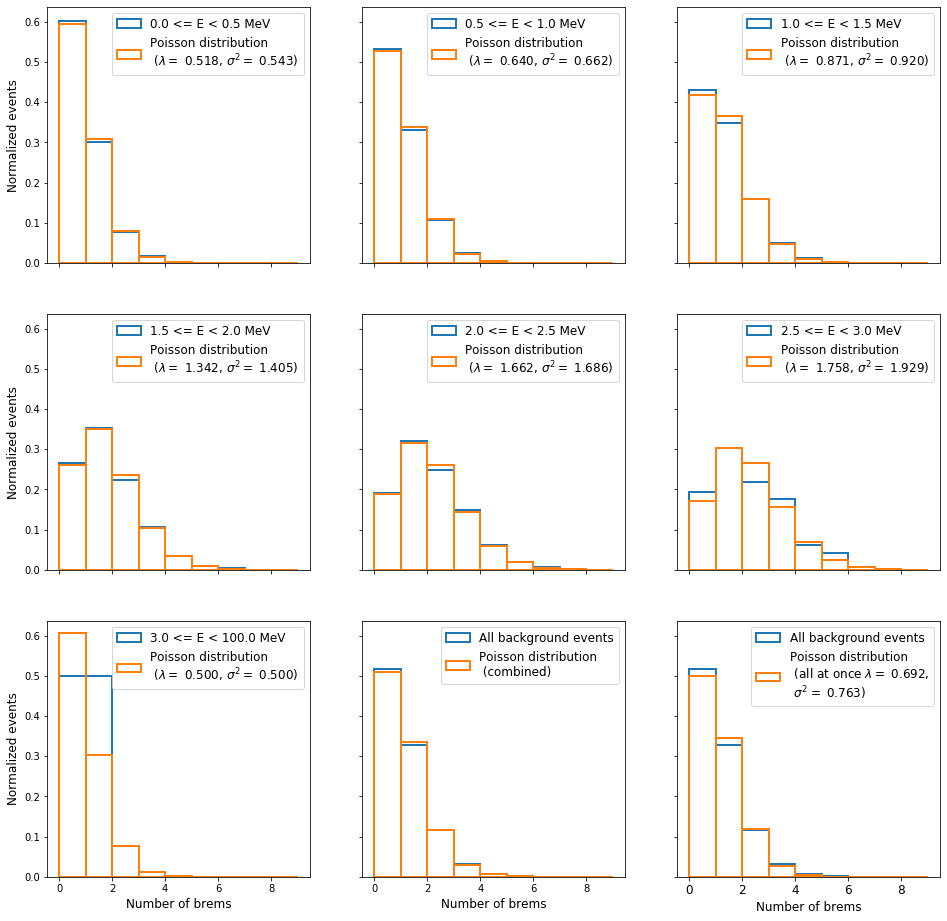

In [9]:
fig, ax = plt.subplots(ncols=3, nrows=3, sharex=True, sharey=True, figsize=(16,16))

brbins = np.linspace(0,8,9)
ebins = np.arange(0,4.0,0.5)
ebins[-1] = 100.
bw = brbins[2] - brbins[1]
brem_pois_all = np.zeros(len(brbins))
brem_pois_m_all = np.zeros(len(brbins))
for i in range(len(ebins)-1):
    eslice = (df_particles['reco_energy'] >= ebins[i])&(df_particles['reco_energy'] < ebins[i+1])
    rate0 = df_particles[eslice]['n_brems'].mean()
    var0 = df_particles[eslice]['n_brems'].var()
    brem_pois = np.exp(-1*rate0)*np.power(rate0,brbins)/factorial(brbins)
#     brem_pois_m = np.exp(-1*mean0)*np.power(mean0,brbins)/factorial(brbins)
    ax[int(i/3)][i%3].hist(df_particles[eslice]['n_brems'], bins=brbins, histtype='step', lw=2, density=True, label='%s <= E < %s MeV'%(ebins[i],ebins[i+1]));
    ax[int(i/3)][i%3].bar(brbins+0.5, brem_pois, width=bw, color='None', edgecolor='C1', lw=2, label='Poisson distribution\n ($\lambda =$ %2.3f, $\sigma^2=$ %2.3f)'%(rate0,var0))
    brem_pois_all += brem_pois*len(df_particles[eslice])

ax[2][1].hist(df_particles['n_brems'], bins=brbins, density=True, histtype='step', lw=2, label='All background events');
ax[2][1].bar(brbins+0.5, brem_pois_all/len(df_particles), width=bw, color='None', edgecolor='C1', lw=2, label='Poisson distribution\n (combined)')

rate0_n = df_particles['n_brems'].mean()
var0_n = df_particles['n_brems'].var()
brem_pois_n = np.exp(-1*rate0_n)*np.power(rate0_n,brbins)/factorial(brbins)
ax[2][2].hist(df_particles['n_brems'], bins=brbins, density=True, histtype='step', lw=2, label='All background events');
ax[2][2].bar(brbins+0.5, brem_pois_n, width=bw, color='None', edgecolor='C1', lw=2, label='Poisson distribution\n (all at once $\lambda =$ %2.3f,\n $\sigma^2=$ %2.3f)'%(rate0_n,var0_n))

ax[0][0].set_ylabel('Normalized events', fontsize=12)
ax[1][0].set_ylabel('Normalized events', fontsize=12)
ax[2][0].set_ylabel('Normalized events', fontsize=12)
ax[2][0].set_xlabel('Number of brems', fontsize=12)
ax[2][1].set_xlabel('Number of brems', fontsize=12)
ax[2][2].set_xlabel('Number of brems', fontsize=12)
plt.tick_params(which='major', axis='both', labelsize=12)

ax[0][0].legend(loc='upper right', fontsize=12)
ax[0][1].legend(loc='upper right', fontsize=12)
ax[0][2].legend(loc='upper right', fontsize=12)
ax[1][0].legend(loc='upper right', fontsize=12)
ax[1][1].legend(loc='upper right', fontsize=12)
ax[1][2].legend(loc='upper right', fontsize=12)
ax[2][0].legend(loc='upper right', fontsize=12)
ax[2][1].legend(loc='upper right', fontsize=12)
ax[2][2].legend(loc='upper right', fontsize=12)

The weight function is shown in the bottom plot in the following cell. The top plot shows the change in the distribution of the number of brems of all of the generated events.
<br><br>
To generate the weights, we use the Poisson distribution:
<br>
$f(k) = e^{-\lambda}\frac{\lambda^k}{k!}$,
<br>
where $\lambda$ is the Bremsstrahlung rate and $k$ is the number of brems. To calculate the weights, we take the ratio of Poisson's with the new rate to the old rate:
<br>
$w_k = f_1(k)/f_0(k) = e^{-(\lambda_1 - \lambda_0)}(\frac{\lambda_1}{\lambda_0})^k$.
<br>
Here, we assume that the new rate is 5% higher than the old ($\lambda_1 = \lambda_0 (1 + 0.05)$). 
We then multiply the weights by a normalization factor, so that they add to the total number of events in the selection:
<br>
$\sum w = N_{selection}$.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


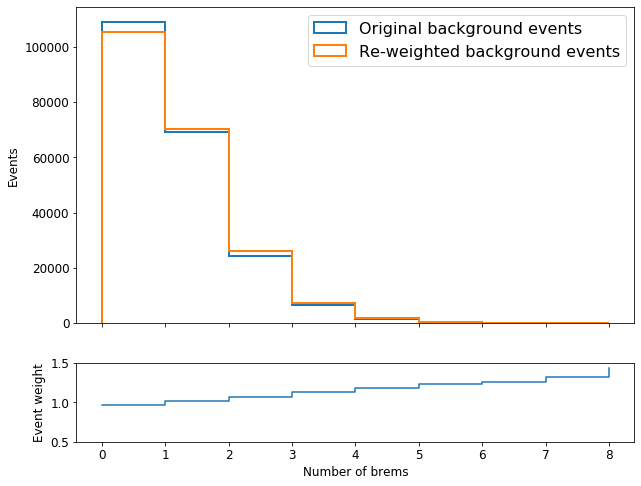

In [10]:
fig, ax = plt.subplots(nrows=2, figsize=(10,8), sharex=True, gridspec_kw={'height_ratios': [4, 1]})

syst_unc = 0.05
eslice_width = 0.5
ebins = np.arange(0, 4.0, eslice_width)
ebins[-1] = 100.
df_particles['weight_plus'] = 1.
df_particles_selection['weight_plus'] = 1.
for i in range(len(ebins)-1):
    eslice = (df_particles['reco_energy'] >= ebins[i])&(df_particles['reco_energy'] < ebins[i+1])
    rate0 = df_particles[eslice]['n_brems'].mean()
    rate1 = rate0*(1 + syst_unc)
    df_particles.loc[eslice, 'weight_plus'] = np.exp(-(rate1-rate0))*(rate1/rate0)**df_particles['n_brems']
    df_particles_selection.loc[eslice, 'weight_plus'] = np.exp(-(rate1-rate0))*(rate1/rate0)**df_particles_selection[eslice]['n_brems']

ax[0].hist(df_particles['n_brems'], bins=brbins, histtype='step', lw=2, label='Original background events');
ax[0].hist(df_particles['n_brems'], weights=df_particles['weight_plus'], bins=brbins, histtype='step', lw=2, label='Re-weighted background events');

ax[1].step(brbins, df_particles.groupby('n_brems')['weight_plus'].first(), where='post')
ax[1].set_ylim(0.5, 1.5)

ax[0].set_ylabel('Events', fontsize=12)
ax[1].set_ylabel('Event weight', fontsize=12)
ax[1].set_xlabel('Number of brems', fontsize=12)

ax[0].tick_params(which='major', axis='both', labelsize=12)
ax[1].tick_params(which='major', axis='both', labelsize=12)

ax[0].legend(loc='upper right', fontsize=16)

Now we can look at the change in the reconstructed energy distribution of the final background selection.

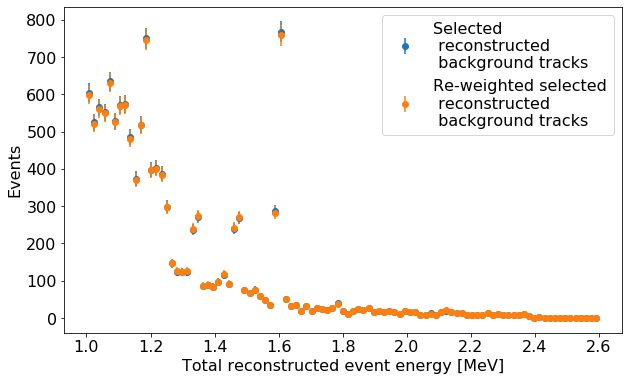

In [11]:
plt.figure(figsize=(10,6))

ebins = np.linspace(1,2.6,100)
bin_centers = (ebins[1:] + ebins[:-1])/2
energy_counts,_ = np.histogram(df_particles_selection['reco_energy'], bins=ebins)
energy_counts_reweight,_ = np.histogram(df_particles_selection['reco_energy'], bins=ebins, weights=df_particles_selection['weight_plus'])

plt.errorbar(bin_centers, energy_counts, yerr=np.sqrt(energy_counts), fmt='o', label='Selected\n reconstructed\n background tracks');
plt.errorbar(bin_centers, energy_counts_reweight, yerr=np.sqrt(energy_counts_reweight), fmt='o', label='Re-weighted selected\n reconstructed\n background tracks');

plt.xlabel('Total reconstructed event energy [MeV]', fontsize=16)
plt.ylabel('Events', fontsize=16)
plt.tick_params(which='major', axis='both', labelsize=16)

plt.legend(loc='upper right', fontsize=16)

In the next example, we do the same thing, except now we assume that the number of brems were overestimated.
<br>
The new weights increase decrease the brem rate by 5%.
<br>
$\lambda_1 = \lambda_0 (1 - 0.05)$.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


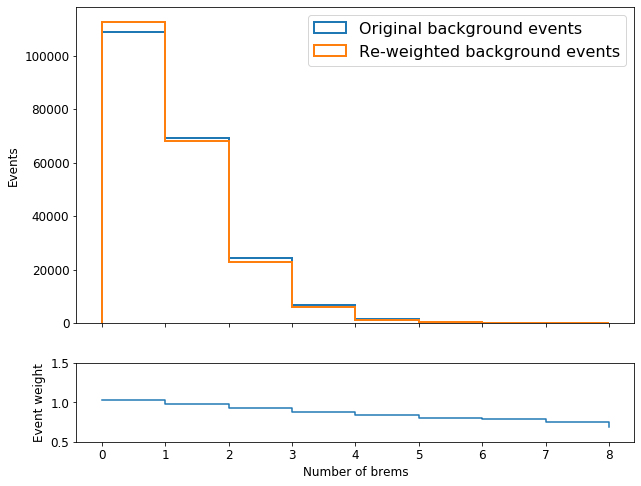

In [12]:
fig, ax = plt.subplots(nrows=2, figsize=(10,8), sharex=True, gridspec_kw={'height_ratios': [4, 1]})

syst_unc = 0.05
eslice_width = 0.5
ebins = np.arange(0, 4.0, eslice_width)
ebins[-1] = 100.
df_particles['weight_minus'] = 1.
df_particles_selection['weight_minus'] = 1.
for i in range(len(ebins)-1):
    eslice = (df_particles['reco_energy'] >= ebins[i])&(df_particles['reco_energy'] < ebins[i+1])
    rate0 = df_particles[eslice]['n_brems'].mean()
    rate1 = rate0*(1 - syst_unc)
    df_particles.loc[eslice, 'weight_minus'] = np.exp(-(rate1-rate0))*(rate1/rate0)**df_particles['n_brems']
    df_particles_selection.loc[eslice, 'weight_minus'] = np.exp(-(rate1-rate0))*(rate1/rate0)**df_particles_selection[eslice]['n_brems']

ax[0].hist(df_particles['n_brems'], bins=brbins, histtype='step', lw=2, label='Original background events');
ax[0].hist(df_particles['n_brems'], weights=df_particles['weight_minus'], bins=brbins, histtype='step', lw=2, label='Re-weighted background events');

ax[1].step(brbins, df_particles.groupby('n_brems')['weight_minus'].first(), where='post')
ax[1].set_ylim(0.5, 1.5)

ax[0].set_ylabel('Events', fontsize=12)
ax[1].set_ylabel('Event weight', fontsize=12)
ax[1].set_xlabel('Number of brems', fontsize=12)

ax[0].tick_params(which='major', axis='both', labelsize=12)
ax[1].tick_params(which='major', axis='both', labelsize=12)

ax[0].legend(loc='upper right', fontsize=16)

Now we can look at the change in the reconstructed energy distribution of the final background selection.

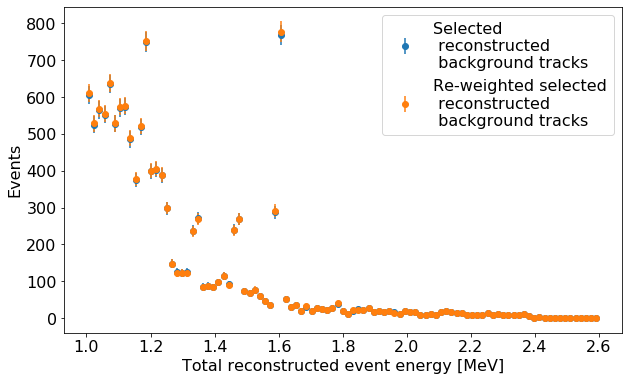

In [13]:
plt.figure(figsize=(10,6))

ebins = np.linspace(1,2.6,100)
bin_centers = (ebins[1:] + ebins[:-1])/2
energy_counts,_ = np.histogram(df_particles_selection['reco_energy'], bins=ebins)
energy_counts_reweight,_ = np.histogram(df_particles_selection['reco_energy'], bins=ebins, weights=df_particles_selection['weight_minus'])

plt.errorbar(bin_centers, energy_counts, yerr=np.sqrt(energy_counts), fmt='o', label='Selected\n reconstructed\n background tracks');
plt.errorbar(bin_centers, energy_counts_reweight, yerr=np.sqrt(energy_counts_reweight), fmt='o', label='Re-weighted selected\n reconstructed\n background tracks');

plt.xlabel('Total reconstructed event energy [MeV]', fontsize=16)
plt.ylabel('Events', fontsize=16)
plt.tick_params(which='major', axis='both', labelsize=16)

plt.legend(loc='upper right', fontsize=16)

The following calculation uses two stages of for loops to randomly select variables that are used to perform the calculation with, this random sampling should eliminate the uncertainty/bias in the calculation as best as possible. 
<br>
<br>
The first loop selects a random systematic uncertainty for the weight calculation from a normal distribution situated around 0 with a width of 0.1, giving basically a random systematic uncertainty in the range of +/- 10%.
<br>
<br>
The first for loop also randomaly selects a width for which the energy bins can be sliced into several chunks of bins. This should eliminate any energy bias in the calculation. 
<br>
<br>
The second for loop calculates the weights of the events based on the radomly selected systematic uncertainty and runs through the loop however many times is necessary to calculate the weight of every bin using the slice width that was selected.
<br>
To calculate the weights, we take the ratio of Poisson's with the new rate to the old rate:
<br>
$w_k = f_1(k)/f_0(k) = e^{-(\lambda_1 - \lambda_0)}(\frac{\lambda_1}{\lambda_0})^k$.
<br>
where $\lambda_1 = \lambda_0(1 \pm Systematic Uncertainty)$ 
<br>
<br>
The first for loop for selecting the sample size can be run as many times as is necessary, however a sample size of around 2800 to 3000 is where the ending values tend to be very steady. 

In [14]:
t0 = time.clock()
#creating the matrix to hold the weights
sample_size = 3000
weight_all = np.zeros((sample_size,len(df_particles_selection['n_brems'])))

#Begin for loop that calculates the weights for each randomly selected uncertainty from 1% - 10% and randomly selected bin width from .2 to 2
for j in range(0,sample_size):
    syst_unc = np.random.normal(0, 0.1)
    eslice_width = np.random.uniform()*(2-.2)+.2
    ebins = np.arange(0, 4.0, eslice_width)
    ebins[-1] = 100
    for i in range(len(ebins)-1):
        eslice = (df_particles['reco_energy'] >= ebins[i])&(df_particles['reco_energy'] < ebins[i+1])
        rate0 = df_particles[eslice]['n_brems'].mean()
        rate1 = rate0*(1 + syst_unc)
        df_particles.loc[eslice, 'weight'] = np.exp(-(rate1-rate0))*(rate1/rate0)**df_particles['n_brems']
        df_particles_selection.loc[eslice, 'weight'] = np.exp(-(rate1-rate0))*(rate1/rate0)**df_particles_selection[eslice]['n_brems']

    #stores the weights for an uncertainty
    weight_all[j] = df_particles_selection['weight']

t1 = time.clock()-t0
print('Time Elapsed:', t1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


Time Elapsed: 506.59892460000003


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


Uncertainty: 0.27305395965194545


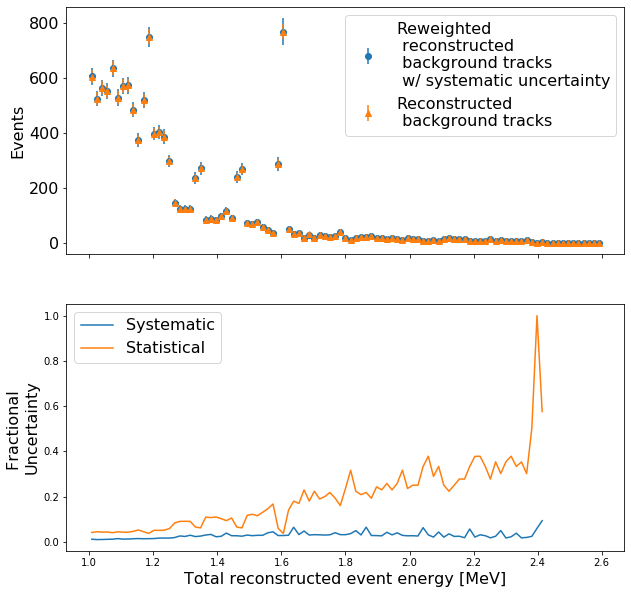

In [15]:
fig, ax = plt.subplots(nrows=2, figsize=(10,10), sharex=True, gridspec_kw={'height_ratios': [1, 1]})

ebins = np.linspace(1,2.6,100)
bin_centers = (ebins[1:] + ebins[:-1])/2
energy_counts,_ = np.histogram(df_particles_selection['reco_energy'], bins=ebins)

#Creating matrices for the total and average histogram counts
energy_counts_reweight_all = np.zeros((sample_size,len(energy_counts)))
energy_counts_reweight = np.zeros(len(energy_counts))

#For loop that stores the histogram values for the counts into the previously created matrices
for i in range(0,sample_size):
    energy_counts_reweight_hist,_ = np.histogram(df_particles_selection['reco_energy'], bins=ebins, weights=weight_all[i])
    energy_counts_reweight_all[i] = energy_counts_reweight_hist

#Calcluates the average of all the values and stores that into the energy_counts_reweight matrix
energy_counts_reweight = energy_counts_reweight_all.mean(0)
#Calculates the standard deviation of the calculated values and the sqrt of the counts for the total error
yerr_tot = energy_counts_reweight_all.std(0) + np.sqrt(energy_counts_reweight)

# Reweighted Counts
ax[0].errorbar(bin_centers, energy_counts_reweight, yerr=yerr_tot, fmt='o', label='Reweighted\n reconstructed\n background tracks\n w/ systematic uncertainty');
#Original counts - Not Reweighted
ax[0].errorbar(bin_centers, energy_counts, yerr=np.sqrt(energy_counts), fmt='^', label='Reconstructed\n background tracks');

ax[1].plot(bin_centers, energy_counts_reweight_all.std(0)/energy_counts_reweight, label='Systematic')
ax[1].plot(bin_centers, np.sqrt(energy_counts_reweight_all.mean(0))/energy_counts_reweight_all.mean(0), label='Statistical')

ax[1].set_xlabel('Total reconstructed event energy [MeV]', fontsize=16)
ax[0].set_ylabel('Events', fontsize=16)
ax[1].set_ylabel('Fractional \nUncertainty', fontsize = 16)
ax[0].tick_params(which='major', axis='both', labelsize=16)

ax[0].legend(loc='upper right', fontsize=16)
ax[1].legend(loc='upper left', fontsize=16)

print('Uncertainty:', yerr_tot[70]/energy_counts_reweight[70])

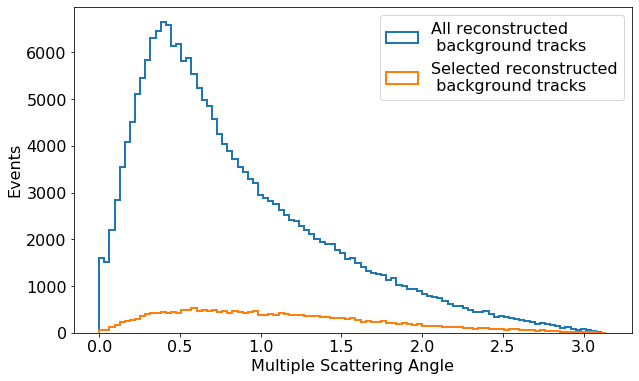

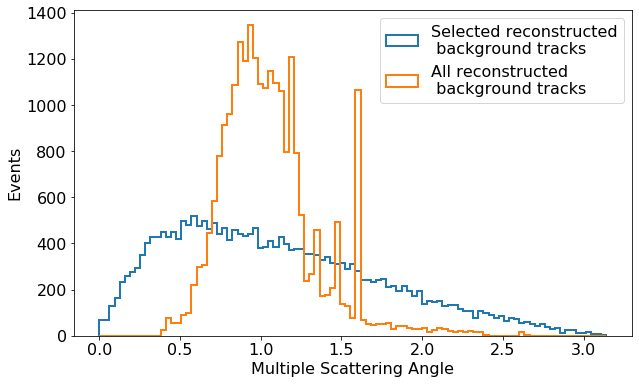

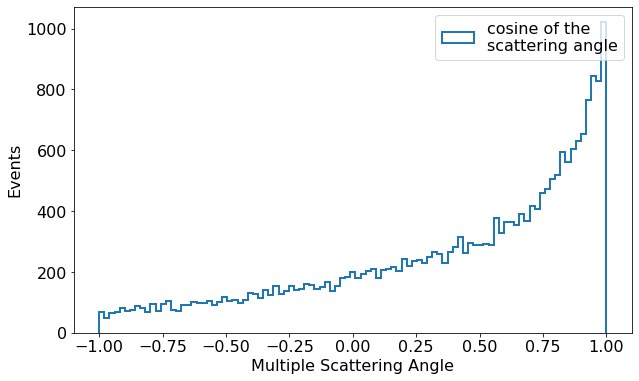

In [16]:
plt.figure(figsize=(10,6))

mcsbins = np.linspace(0,np.pi,100)
mcscosbins = np.linspace(-1,1,100)

plt.hist(df_particles['mcs_angle'], bins=mcsbins, histtype='step', lw=2, label='All reconstructed\n background tracks');
plt.hist(df_particles_selection['mcs_angle'], bins=mcsbins, histtype='step', lw=2, label='Selected reconstructed\n background tracks');

plt.xlabel(r'Multiple Scattering Angle', fontsize=16)
plt.ylabel('Events', fontsize=16)
plt.tick_params(which='major', axis='both', labelsize=16)

plt.legend(loc='upper right', fontsize=16)

plt.figure(figsize=(10,6))

plt.hist(df_particles_selection['mcs_angle'], bins=mcsbins, histtype='step', lw=2, label='Selected reconstructed\n background tracks');
plt.hist(df_particles_selection['reco_energy'], bins=mcsbins, histtype='step', lw=2, label='All reconstructed\n background tracks');

plt.xlabel(r'Multiple Scattering Angle', fontsize=16)
plt.ylabel('Events', fontsize=16)
plt.tick_params(which='major', axis='both', labelsize=16)

plt.legend(loc='upper right', fontsize=16)

plt.figure(figsize=(10,6))

# plt.hist(df_particles_selection['mcs_angle'], bins=mcsbins, histtype='step', lw=2, label='scattering angle');
plt.hist(np.cos(df_particles_selection['mcs_angle']), bins=mcscosbins, histtype='step', lw=2, label='cosine of the \nscattering angle');

plt.xlabel(r'Multiple Scattering Angle', fontsize=16)
plt.ylabel('Events', fontsize=16)
plt.tick_params(which='major', axis='both', labelsize=16)

plt.legend(loc='upper right', fontsize=16)



        6         5         4        3        2
-18.62 x + 207.7 x - 946.9 x + 2295 x - 3138 x + 2030 x - 3.606


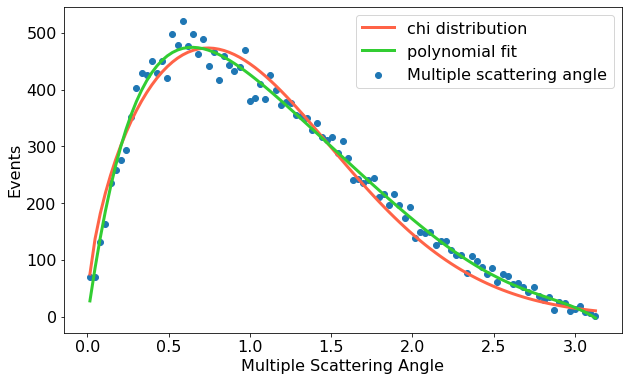

In [17]:
plt.figure(figsize=(10,6))

bin_centers = (mcsbins[1:] + mcsbins[:-1])/2
mcs_angle,_ = np.histogram(df_particles_selection['mcs_angle'], bins=mcsbins)

plt.scatter(bin_centers, mcs_angle, label='Multiple scattering angle')

plt.plot(bin_centers, chi.pdf(bin_centers, df=1.55, loc=0)*750, label='chi distribution', lw=3, color='tomato')

# plt.plot(bin_centers, exponnorm.pdf(bin_centers, K=.03, loc=1)*1000, lw=3, color='tomato')

p = np.poly1d(np.polyfit(bin_centers, mcs_angle, 6))
print(p)
plt.plot(bin_centers, p(bin_centers), label= 'polynomial fit', lw=3, color='limegreen')

mcsdata = mcs_angle
file1 = open(r"C:\Users\logno\Documents\MATLAB\mcsdata.txt", "w")
file1.write(df_particles_selection['mcs_angle'].to_string())
file1.close()

plt.xlabel(r'Multiple Scattering Angle', fontsize=16)
plt.ylabel('Events', fontsize=16)
plt.tick_params(which='major', axis='both', labelsize=16)

plt.legend(loc = 'upper right', fontsize=16)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


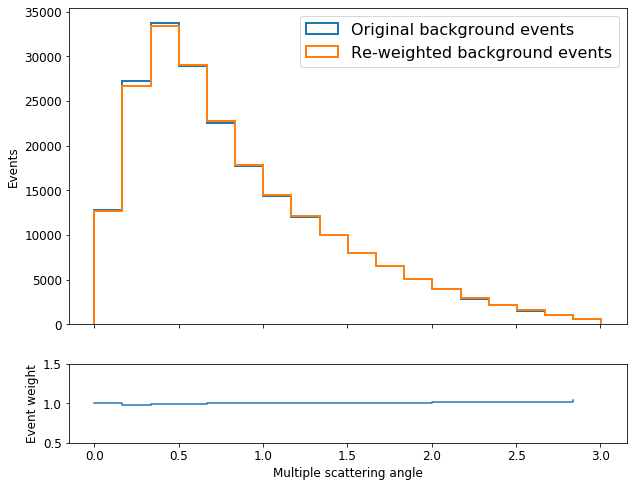

In [30]:
fig, ax = plt.subplots(nrows=2, figsize=(10,8), sharex=True, gridspec_kw={'height_ratios': [4, 1]})

sample_size = 100

for j in range(0,sample_size):
    syst_unc = np.random.normal(0, 0.1)
    bin_width = np.random.uniform()*(.05-.2)+.2
#     syst_unc = 0.05
#     bin_width = 0.01

    mcsbins = np.arange(0, 3.15, bin_width)

    df_particles['weight_mcs'] = 1.
    df_particles_selection['weight_mcs'] = 1.

    mcs_counts,_ = np.histogram(df_particles['mcs_angle'], bins=mcsbins)
    mcs_counts_select,_ = np.histogram(df_particles_selection['mcs_angle'], bins=mcsbins)
    weight_vec = np.ones(len(mcsbins) - 1)

    for i in range(len(mcsbins) - 1):
        bin_slice = (df_particles['mcs_angle'] >= mcsbins[i])&(df_particles['mcs_angle'] < mcsbins[i+1])
        bin_slice_select = (df_particles_selection['mcs_angle'] >= mcsbins[i])&(df_particles_selection['mcs_angle'] < mcsbins[i+1])
        if syst_unc > 0 and i != 0:
            df_particles.loc[bin_slice, 'weight_mcs'] = (1-syst_unc) + mcs_counts[i-1]/mcs_counts[i]*syst_unc
            df_particles_selection.loc[bin_slice_select, 'weight_mcs'] = (1-syst_unc) + mcs_counts_select[i-1]/mcs_counts_select[i]*syst_unc
            weight_vec[i] = (1-syst_unc) + mcs_counts_select[i-1]/mcs_counts_select[i]*syst_unc
        elif syst_unc <= 0 and i+1 != len(mcs_counts):
            df_particles.loc[bin_slice, 'weight_mcs'] = (1-syst_unc) + mcs_counts[i+1]/mcs_counts[i]*syst_unc
            df_particles_selection.loc[bin_slice_select, 'weight_mcs'] = (1-syst_unc) + mcs_counts_select[i+1]/mcs_counts_select[i]*syst_unc
            weight_vec[i] = (1-syst_unc) + mcs_counts_select[i-1]/mcs_counts_select[i]*syst_unc
        
weight_norm = len(df_particles)/df_particles['weight_mcs'].sum()
weight_norm_select = len(df_particles_selection)/df_particles_selection['weight_mcs'].sum()

df_particles['weight_mcs'] = df_particles['weight_mcs']*weight_norm
df_particles_selection['weight_mcs'] = df_particles_selection['weight_mcs']*weight_norm_select

ax[0].hist(df_particles['mcs_angle'], bins=mcsbins, histtype='step', lw=2, label='Original background events');

ax[0].hist(df_particles['mcs_angle'], weights=df_particles['weight_mcs'], bins=mcsbins, histtype='step', lw=2, label='Re-weighted background events');

ax[1].step(mcsbins[:-1], weight_vec, where='post')

ax[1].set_ylim(0.5, 1.5)
ax[0].set_ylabel('Events', fontsize=12)
ax[1].set_ylabel('Event weight', fontsize=12)
ax[1].set_xlabel('Multiple scattering angle', fontsize=12)
ax[0].tick_params(which='major', axis='both', labelsize=12)
ax[1].tick_params(which='major', axis='both', labelsize=12)
ax[0].legend(loc='upper right', fontsize=16)